### This notebook combines a Hawaiian daily rainfall dataset (1990-2010) with the SOM analysis to produce rainfall maps for each node pattern

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [34]:
# Load in locations of daily winning nodes from 1981-2010
winners = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/ERA5/hourly/winners_sorted.npy')

In [35]:
# Convert to pandas dataframe
df1 = pd.DataFrame(winners)

In [36]:
# Rename columns
df1 = df1.rename({0: 'a', 1: 'b'}, axis='columns')

In [37]:
# Get time steps associated with each of the 12 nodes 
q1 = df1.query('a == 0.0')
node00 = q1.query('b == 0.0')

q01 = df1.query('a == 0.0')
node01 = q01.query('b == 1.0')

q02 = df1.query('a == 0.0')
node02 = q02.query('b == 2.0')

q10 = df1.query('a == 1.0')
node10 = q10.query('b == 0.0')

q11 = df1.query('a == 1.0')
node11 = q11.query('b == 1.0')

q12 = df1.query('a == 1.0')
node12 = q12.query('b == 2.0')

q20 = df1.query('a == 2.0')
node20 = q20.query('b == 0.0')

q21 = df1.query('a == 2.0')
node21 = q21.query('b == 1.0')

q22 = df1.query('a == 2.0')
node22 = q22.query('b == 2.0')

q30 = df1.query('a == 3.0')
node30 = q30.query('b == 0.0')

q31 = df1.query('a == 3.0')
node31 = q31.query('b == 1.0')

q32 = df1.query('a == 3.0')
node32 = q32.query('b == 2.0')

In [38]:
file = xr.open_dataset('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/UH_1990.nc4')

In [39]:
ND = np.load('../np_arrays/ND_count_unlabeled.npy')
NC = np.load('../np_arrays/NC_count_unlabeled.npy')
CR = np.load('../np_arrays/CR_count_unlabeled.npy')
KL = np.load('../np_arrays/KL_count_unlabeled.npy')
UL = np.load('../np_arrays/UL_count_unlabeled.npy')

In [40]:
# List disturbance counts per node
ND_tot = ND.T.reshape(12)
NC_tot = NC.T.reshape(12)
CR_tot = CR.T.reshape(12)
KL_tot = KL.T.reshape(12)
UL_tot = UL.T.reshape(12)
ALL_tot = ND_tot + NC_tot + CR_tot + KL_tot + UL_tot

In [41]:
# Plot rainfall for each disturbance type

# Reference lat/lon
lat = file.latitude
lon = file.longitude
elevation = file.elevation

mask = np.ma.masked_array(elevation, np.isnan(elevation))

wet_dry = plt.cm.BrBG

# Fix colorbar so white is always on zero
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [43]:
ND_ref = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/ND_ref_new.npy')
NC_ref = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/NC_ref_new.npy')
CR_ref = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/CR_ref_new.npy')
KL_ref = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/KL_ref_new.npy')
UL_ref = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/UL_ref_new.npy')
ALL_ref = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/ALL_ref_new.npy')

In [44]:
var = 'ALL'
ref = ALL_ref
tot = ALL_tot

ref00 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_00_new.npy')
ref01 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_01_new.npy')
ref02 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_02_new.npy')
ref10 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_10_new.npy')
ref11 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_11_new.npy')
ref12 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_12_new.npy')
ref20 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_20_new.npy')
ref21 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_21_new.npy')
ref22 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_22_new.npy')
ref30 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_30_new.npy')
ref31 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_31_new.npy')
ref32 = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/DATA/HI_rainfall/'+var+'_mm_day_32_new.npy')

<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:115: SyntaxWarning: invalid escape sequence '\c'
<>:115: SyntaxWarning: invalid escape sequence '\c'
<>:117: SyntaxWarning: invalid escape sequence '\c'
<>:117: SyntaxWarning: invalid escape sequence '\c'
<>:127: SyntaxWarning: invalid escape sequence '\c'
<>:127: SyntaxWarning: invalid escape sequence '\c'
<>:139: SyntaxWarning: invalid escape sequence '\c'
<>:139: SyntaxWarning: invalid escape sequence '\c'
<>:151: SyntaxWarning: invalid escape sequence '\c'
<>:151: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:115: SyntaxWarning: invalid escape sequence '\c'
<>:115: SyntaxWarnin

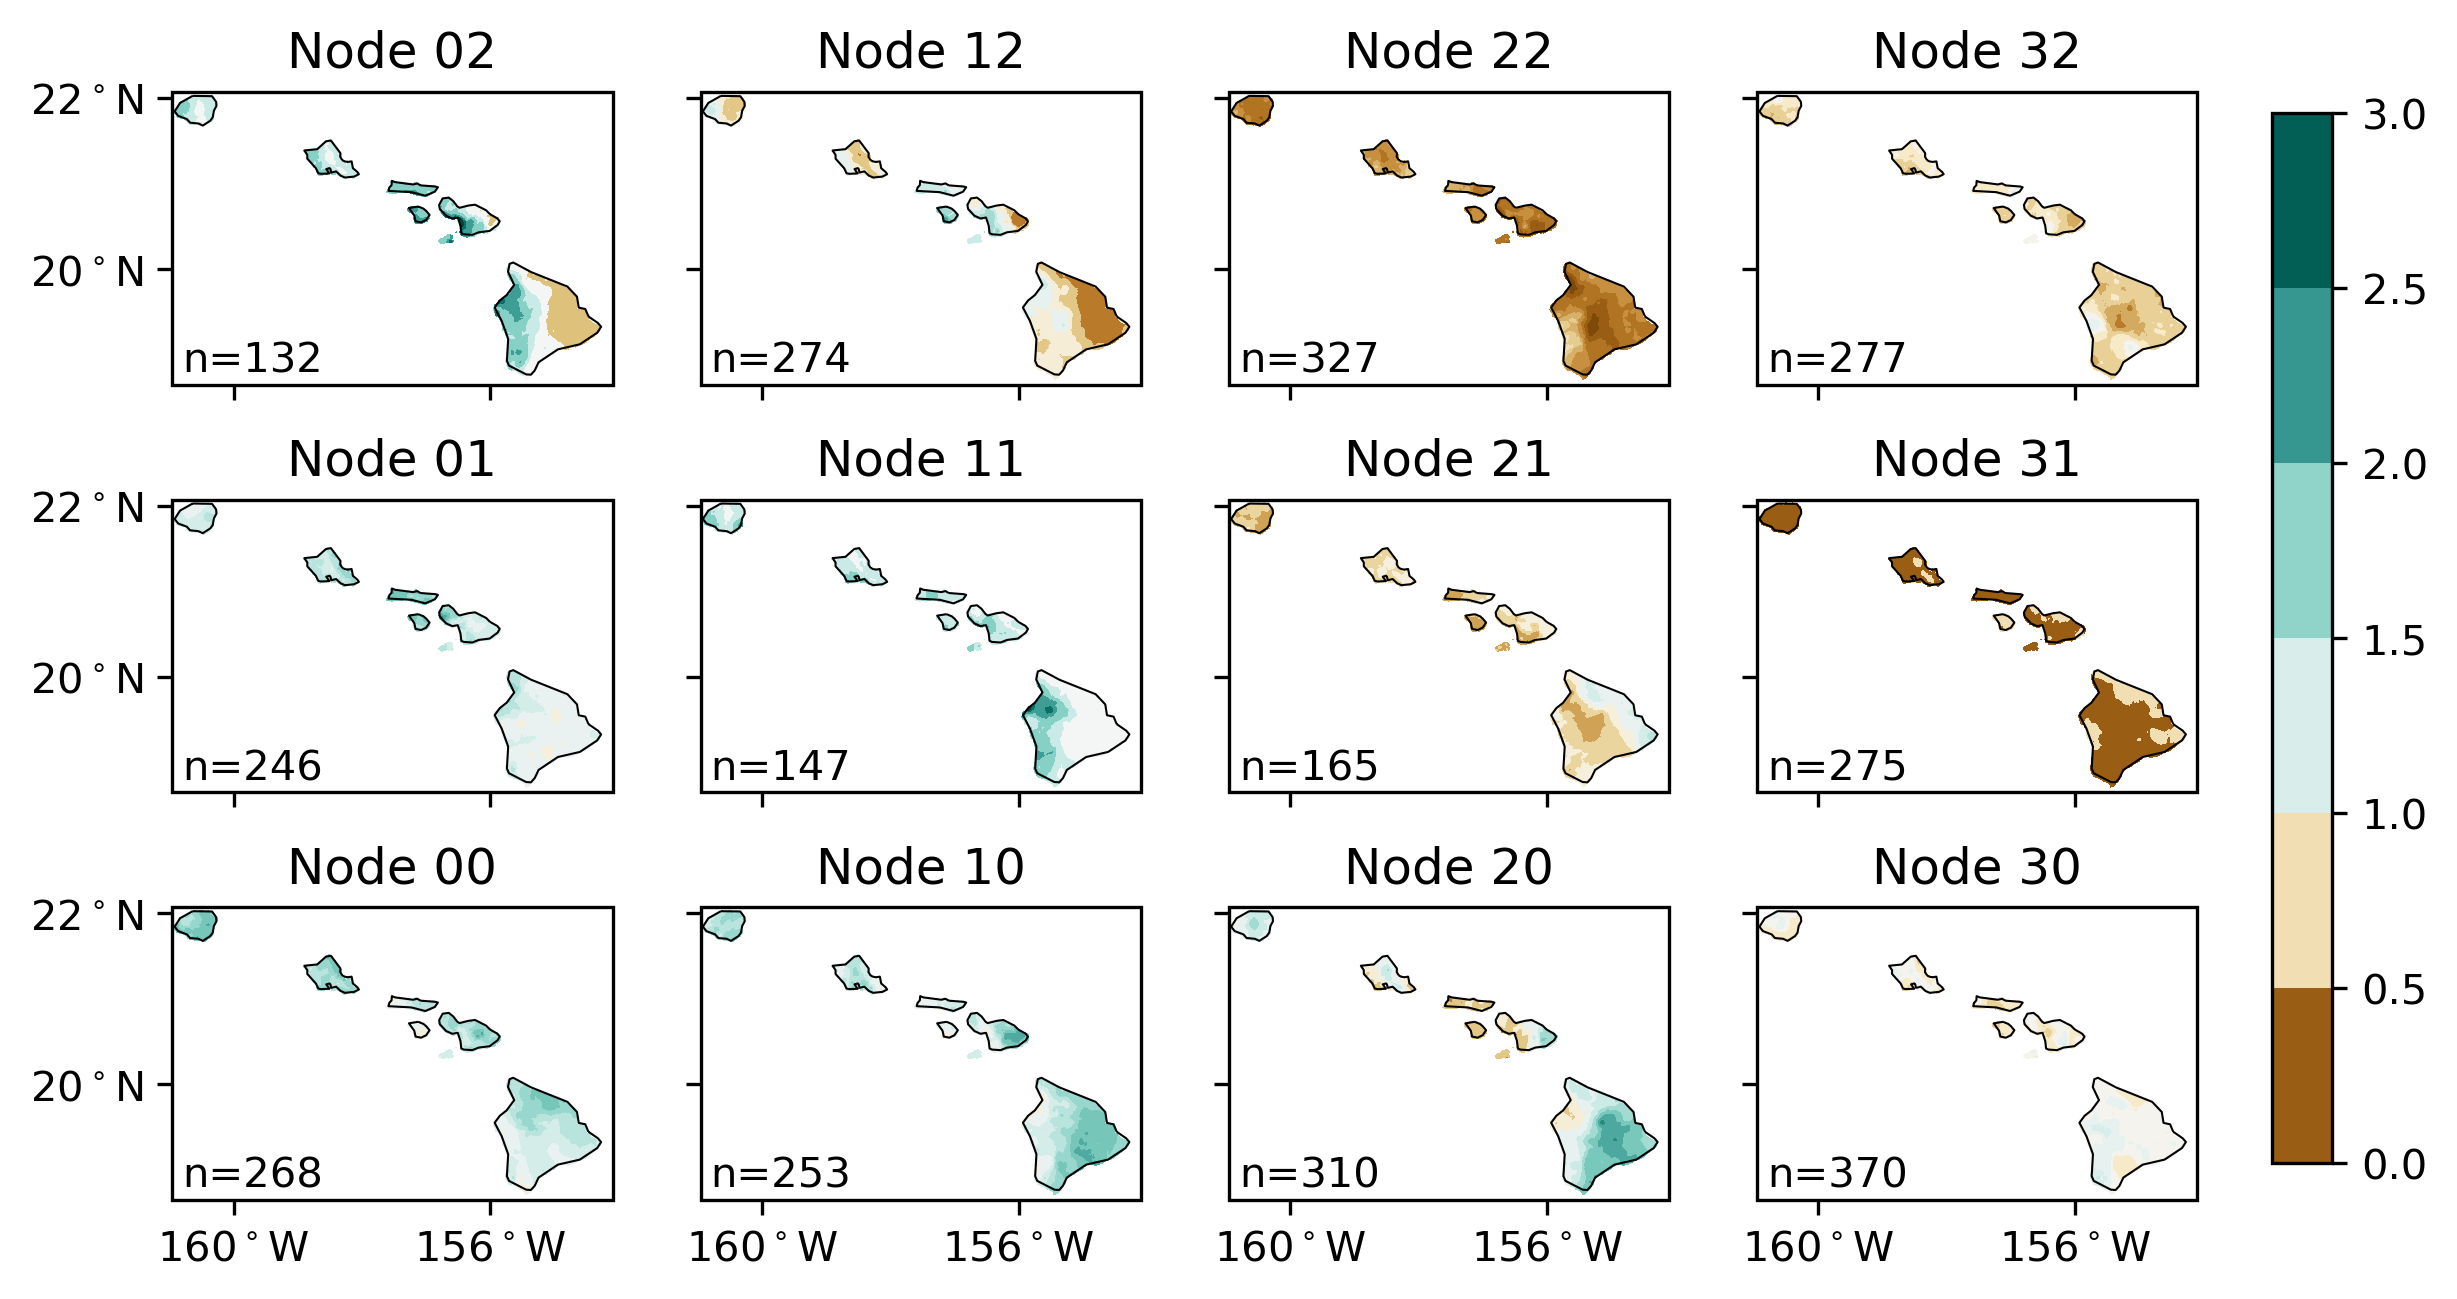

In [45]:
# Plot wet season rainfall differences
import cartopy.crs as crs
import cartopy.feature as cfeature
crs = crs.PlateCarree()

fig, axarr = plt.subplots(nrows=3, ncols=4, figsize=(10, 5), dpi = 300, constrained_layout=False, subplot_kw={'projection': crs})

axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)
    
vmin = 0
vmax = 3.1

scheme = plt.cm.BrBG
#plt.subplots_adjust(wspace=None,hspace=None)

subplot1 = axlist[0].contourf(lon, lat, (ref02/ref), vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1), cmap = scheme, transform = crs)
#axlist[0].pcolor(lon,lat,np.ma.masked_where(mask_sig==False,(ref02/ref)), hatch = '///',transform=crs)
axlist[0].annotate('n='+str(int(tot[8])), xy = (-159.7,19.0), size = 10)
axlist[0].set_title('Node 02', fontsize = 12)
axlist[0].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[0].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[0].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[0].set_xticklabels('')
#colorbar1 = fig.colorbar(subplot1, ax=axlist[0],orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar1.set_label('mm/day', size = 'small')

#subplot2 = axlist[1].contourf(lon, lat, np.ma.masked_where(mask_sig == False,(ref12/ref)), vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
subplot2 = axlist[1].contourf(lon, lat, (ref12/ref), vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
#axlist[1].pcolor(lon,lat,np.ma.masked_where(mask_sig==False,(ref12/ref)), hatch = '///',transform=crs)
axlist[1].annotate('n='+str(int(tot[9])), xy = (-159.7,19.0), size = 10)
axlist[1].set_title('Node 12', fontsize = 12)
axlist[1].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[1].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[1].set_yticklabels('')
axlist[1].set_xticklabels('')
#colorbar2 = fig.colorbar(subplot2, ax=axlist[1], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar2.set_label('%', size = 'small')

subplot3 = axlist[2].contourf(lon, lat, (ref22/ref), vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[2].annotate('n='+str(int(tot[10])), xy = (-159.7,19.0), size = 10)
axlist[2].set_title('Node 22', fontsize = 12)
axlist[2].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[2].set_xticklabels('')
axlist[2].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[2].set_yticklabels('')
#colorbar3 = fig.colorbar(subplot3, ax=axlist[2], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar3.set_label('%', size = 'small')

subplot4 = axlist[3].contourf(lon, lat, (ref32/ref),vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[3].annotate('n='+str(int(tot[11])), xy = (-159.7,19.0), size = 10)
axlist[3].set_title('Node 32', fontsize = 12)
axlist[3].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[3].set_xticklabels('')
axlist[3].set_yticklabels('')
axlist[3].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#colorbar4 = fig.colorbar(subplot4, ax=axlist[3], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar4.set_label('%', size = 'small')


subplot5 = axlist[4].contourf(lon, lat, (ref01/ref),vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1), cmap = scheme, transform = crs)
axlist[4].annotate('n='+str(int(tot[4])), xy = (-159.7,19.0), size = 10)
axlist[4].set_title('Node 01', fontsize = 12)
axlist[4].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[4].set_xticklabels('')
axlist[4].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[4].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
#axlist[4].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
#colorbar5 = fig.colorbar(subplot5, ax=axlist[4], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar5.set_label('%', size = 'small')

subplot6 = axlist[5].contourf(lon, lat, (ref11/ref),vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[5].annotate('n='+str(int(tot[5])), xy = (-159.7,19.0), size = 10)
axlist[5].set_title('Node 11', fontsize = 12)
axlist[5].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
#axlist[5].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[5].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#axlist[5].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[5].set_yticklabels('')
axlist[5].set_xticklabels('')
#colorbar6 = fig.colorbar(subplot6, ax=axlist[5], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar6.set_label('%', size = 'small')
                  
subplot7 = axlist[6].contourf(lon, lat, (ref21/ref),vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[6].set_title('Node 21', fontsize = 12)
axlist[6].annotate('n='+str(int(tot[6])), xy = (-159.7,19.0), size = 10)
axlist[6].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
#axlist[6].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[6].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#axlist[6].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[6].set_yticklabels('')
axlist[6].set_xticklabels('')
#colorbar7 = fig.colorbar(subplot7, ax=axlist[6], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar7.set_label('%', size = 'small')

                                
subplot8 = axlist[7].contourf(lon, lat, (ref31/ref),vmin = vmin, vmax = vmax, levels = np.arange(vmin,vmax,0.5),norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[7].set_title('Node 31', fontsize = 12)
axlist[7].annotate('n='+str(int(tot[7])), xy = (-159.7,19.0), size = 10)
axlist[7].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
#axlist[7].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[7].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#axlist[7].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[7].set_yticklabels('')
axlist[7].set_xticklabels('')
#colorbar8 = fig.colorbar(subplot8, ax=axlist[7], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar8.set_label('%', size = 'small')


subplot9 = axlist[8].contourf(lon, lat, (ref00/ref),vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[8].set_title('Node 00', fontsize = 12)
axlist[8].annotate('n='+str(int(tot[0])), xy = (-159.7,19.0), size = 10)
axlist[8].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[8].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[8].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[8].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
#axlist[8].set_yticklabels('')
#colorbar9 = fig.colorbar(subplot9, ax=axlist[8], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar9.set_label('%', size = 'small')


subplot10 = axlist[9].contourf(lon, lat, (ref10/ref),vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[9].set_title('Node 10', fontsize = 12)
axlist[9].annotate('n='+str(int(tot[1])), xy = (-159.7,19.0), size = 10)
axlist[9].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[9].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[9].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#axlist[9].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[9].set_yticklabels('')
#colorbar10 = fig.colorbar(subplot10, ax=axlist[9], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar10.set_label('%', size = 'small')   

                         
subplot11 = axlist[10].contourf(lon, lat, (ref20/ref),vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1), cmap = scheme, transform = crs)
axlist[10].set_title('Node 20', fontsize = 12)
axlist[10].annotate('n='+str(int(tot[2])), xy = (-159.7,19.0), size = 10)
axlist[10].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[10].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[10].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#axlist[10].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[10].set_yticklabels('')
#colorbar11 = fig.colorbar(subplot11, ax=axlist[10], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar11.set_label('%', size = 'small')      

    
subplot12 = axlist[11].contourf(lon, lat, ref30/ref,vmin = vmin, vmax = vmax, norm = MidpointNormalize(midpoint = 1),cmap = scheme, transform = crs)
axlist[11].set_title('Node 30', fontsize = 12)
axlist[11].annotate('n='+str(int(tot[3])), xy = (-159.7,19.0), size = 10)
axlist[11].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[11].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[11].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#axlist[11].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[11].set_yticklabels('')
#colorbar12 = fig.colorbar(subplot12, ax=axlist[11], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar12.set_label('%', size = 'small')      

                                
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.15, 0.02, 0.7])
cbar = fig.colorbar(subplot8, cax=cbar_ax, ticks = np.arange(vmin, vmax, 0.5), orientation='vertical', shrink = 0.70, pad = 0.0)
#cbar.set_label('$RC_{UL,i}$')


#fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.025, hspace=0.025, wspace=0.0)
plt.savefig('rel_dist_intensity.png')
plt.show()

### This figure shows that nodes in the lower-left hand part of the SOM are associated with above-normal rainfall totals, while nodes in the upper right-hand part of the SOM are associated with below normal rainfall.

## Plot rainfall intensities of each disturbance type

<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:63: SyntaxWarning: invalid escape sequence '\c'
<>:63: SyntaxWarning: invalid escape sequence '\c'
<>:79: SyntaxWarning: invalid escape sequence '\c'
<>:79: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:63: SyntaxWarning: invalid escape sequence '\c'
<>:63: SyntaxWarning: invalid escape sequence '\c'
<>:79: SyntaxWarning: invalid escape sequence '\c'
<>:79: SyntaxWarning: invalid e

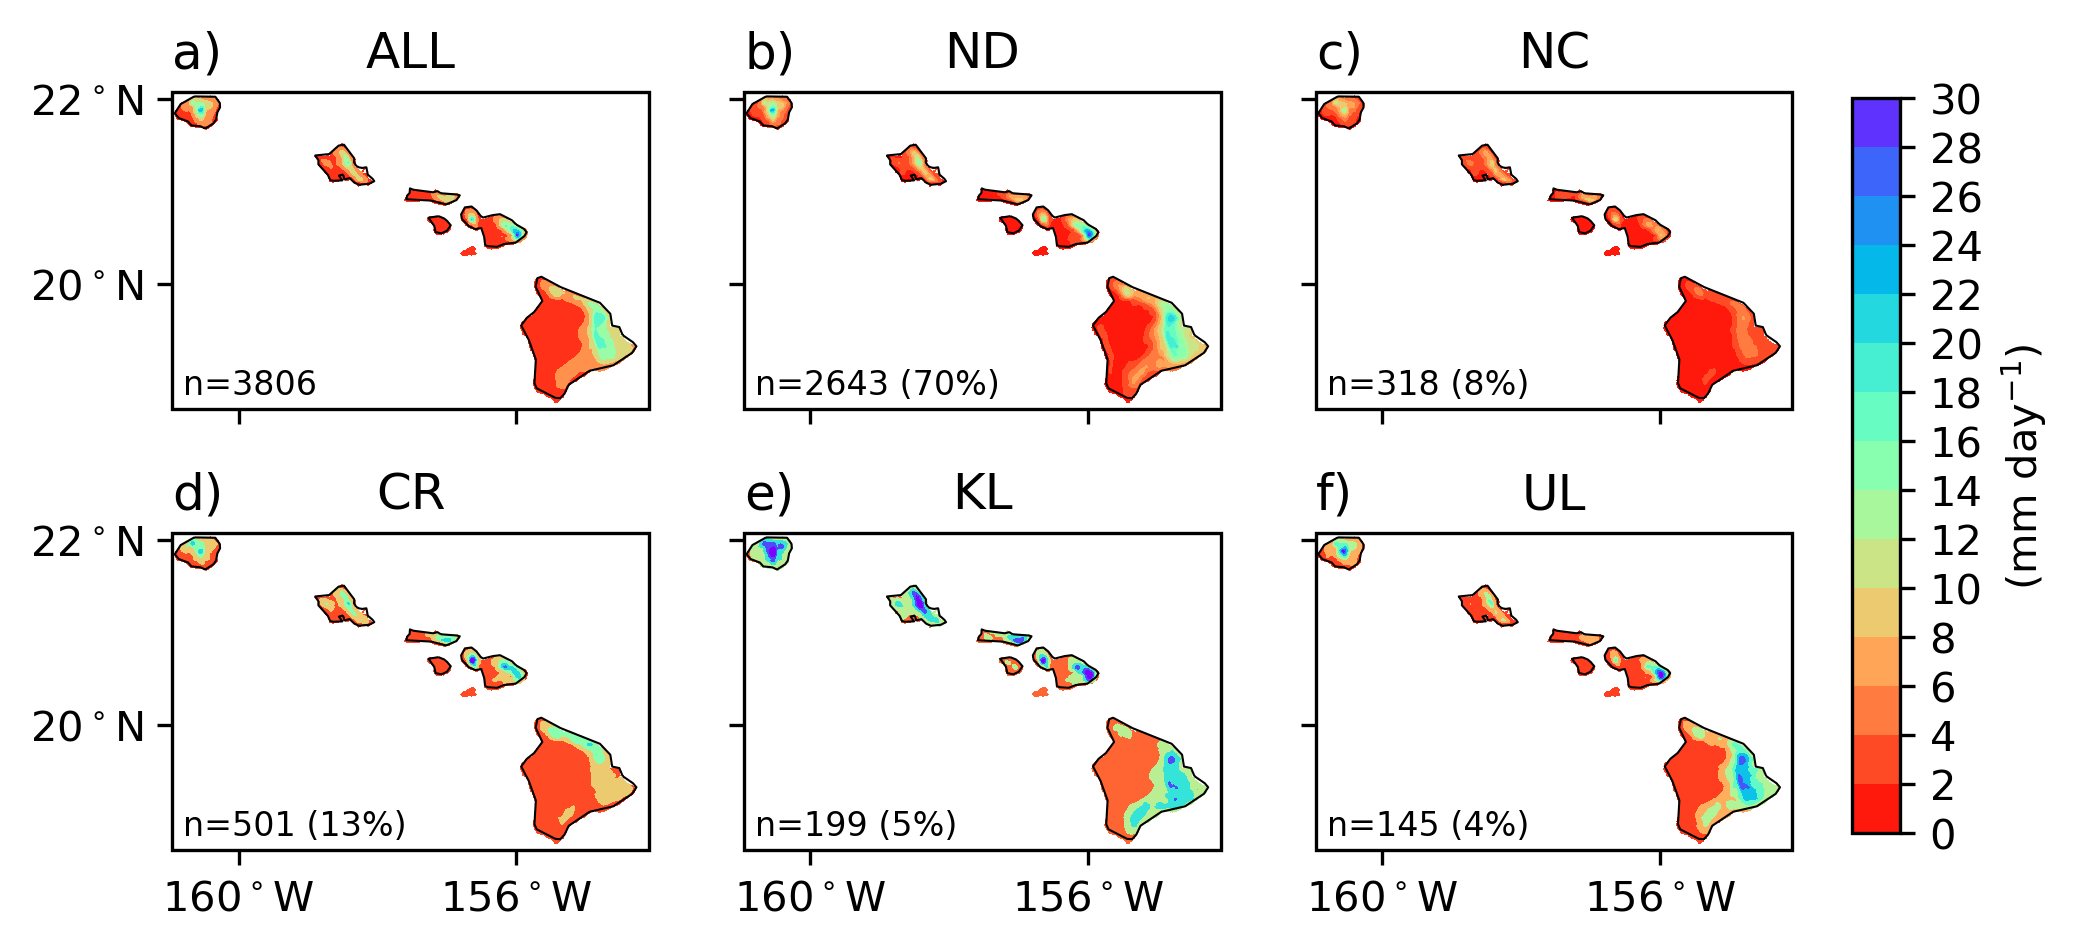

In [46]:

fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=(8, 3.5), dpi = 300, constrained_layout=False, subplot_kw={'projection': crs})

axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)
    
vmin = 0
vmax = 31

scheme=plt.cm.rainbow_r

#plt.subplots_adjust(wspace=None,hspace=None)

subplot1 = axlist[0].contourf(lon, lat, np.ma.masked_where(mask == True,ALL_ref), vmin = vmin, vmax = vmax, cmap = scheme, transform = crs)
axlist[0].set_title('a)', loc='left')
axlist[0].set_title('ALL', fontsize = 12)
axlist[0].annotate('n=3806', xy = (-159.7,19.0), size = 8)
axlist[0].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[0].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[0].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[0].set_xticklabels('')
#colorbar1 = fig.colorbar(subplot1, ax=axlist[0],orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar1.set_label('mm/day', size = 'small')

subplot2 = axlist[1].contourf(lon, lat, np.ma.masked_where(mask == True,ND_ref), vmin = vmin, vmax = vmax, levels=np.arange(vmin,vmax,2),cmap = scheme, transform = crs)
axlist[1].set_title('b)', loc='left')
axlist[1].set_title('ND', fontsize = 12)
axlist[1].annotate('n=2643 (70%)', xy = (-159.7,19.0), size = 8)
axlist[1].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[1].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[1].set_yticklabels('')
axlist[1].set_xticklabels('')
#colorbar2 = fig.colorbar(subplot2, ax=axlist[1], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar2.set_label('%', size = 'small')

subplot3 = axlist[2].contourf(lon, lat, np.ma.masked_where(mask == True,NC_ref), vmin = vmin, vmax = vmax,cmap = scheme, transform = crs)
axlist[2].set_title('c)', loc='left')
axlist[2].set_title('NC', fontsize = 12)
axlist[2].annotate('n=318 (8%)', xy = (-159.7,19.0), size = 8)
axlist[2].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[2].set_xticklabels('')
axlist[2].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[2].set_yticklabels('')
#colorbar3 = fig.colorbar(subplot3, ax=axlist[2], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar3.set_label('%', size = 'small')

subplot4 = axlist[3].contourf(lon, lat, np.ma.masked_where(mask == True,CR_ref),vmin = vmin, vmax = vmax,cmap = scheme, transform = crs)
axlist[3].set_title('d)', loc='left')
axlist[3].set_title('CR', fontsize = 12)
axlist[3].annotate('n=501 (13%)', xy = (-159.7,19.0), size = 8)
axlist[3].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[3].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[3].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[3].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
#colorbar4 = fig.colorbar(subplot4, ax=axlist[3], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar4.set_label('%', size = 'small')

subplot5 = axlist[4].contourf(lon, lat, np.ma.masked_where(mask == True,KL_ref),vmin = vmin, vmax = vmax, cmap = scheme, transform = crs)
axlist[4].set_title('e)', loc='left')
axlist[4].set_title('KL', fontsize = 12)
axlist[4].annotate('n=199 (5%)', xy = (-159.7,19.0), size = 8)
axlist[4].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
axlist[4].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[4].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
axlist[4].set_yticklabels('')
#axlist[4].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
#colorbar5 = fig.colorbar(subplot5, ax=axlist[4], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar5.set_label('%', size = 'small')

subplot6 = axlist[5].contourf(lon, lat, np.ma.masked_where(mask == True,UL_ref),vmin = vmin, vmax = vmax,cmap = scheme, transform = crs)
axlist[5].set_title('f)', loc='left')
axlist[5].set_title('UL', fontsize = 12)
axlist[5].annotate('n=145 (4%)', xy = (-159.7,19.0), size = 8)
axlist[5].set_xticks(ticks = np.around(np.arange(lon.min()+0.7, lon.max(),3), decimals = 1))
#axlist[5].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
axlist[5].set_yticks(ticks = np.around(np.arange(lat.min()+1.4, lat.max(),2), decimals = 1))
#axlist[5].set_yticklabels(labels = ['20$^\circ$N','22$^\circ$N'])
axlist[5].set_yticklabels('')
axlist[5].set_xticklabels(labels = ['160$^\circ$W','156$^\circ$W'])
#colorbar6 = fig.colorbar(subplot6, ax=axlist[5], orientation='vertical', shrink = 0.70, pad = 0.025)
#colorbar6.set_label('%', size = 'small')
                               
                              
                                
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.15, 0.02, 0.7])
cbar = fig.colorbar(subplot2, cax=cbar_ax, ticks = np.arange(vmin, vmax, 2), extend = 'max',orientation='vertical', shrink = 0.70, pad = 0.0)
cbar.set_label('(mm day$^{-1}$)')

#fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.025, hspace=0.025, wspace=0.0)
plt.savefig('baseline_dist_intensity.png')
plt.show()
